# Colours and images

In [22]:
import cv2
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [23]:
# cv2.inRange(src, lowerb, upperb[, dst])
# src: input image
# lowerb: lower bound array
# upperb: upper bound array
# dst: output image of the same size as src and CV_8U type

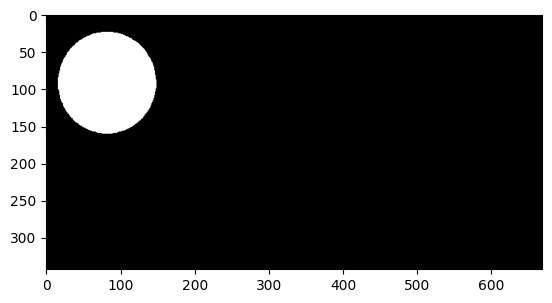

In [24]:
img = cv2.imread("t06.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# color range of interest
min_angle = 90
max_angle = 135

lower_value = np.array([int(min_angle/360*255), 50, 50])
upper_value = np.array([int(max_angle/360*255), 255, 255])

mask = cv2.inRange(hsv_img, lower_value, upper_value)

# show
plt.imshow(mask, cmap='gray')

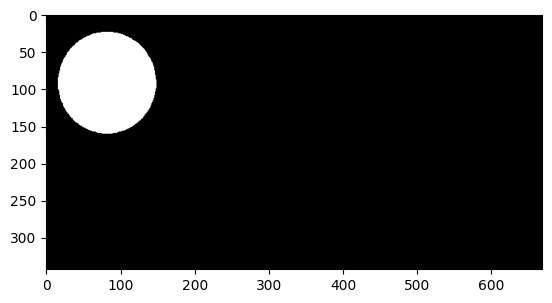

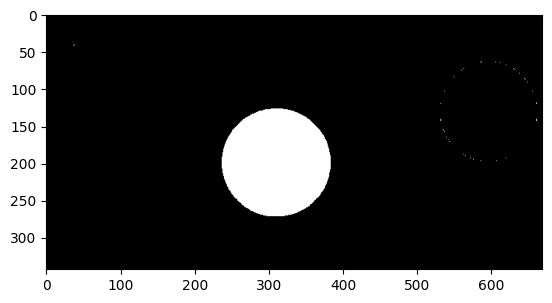

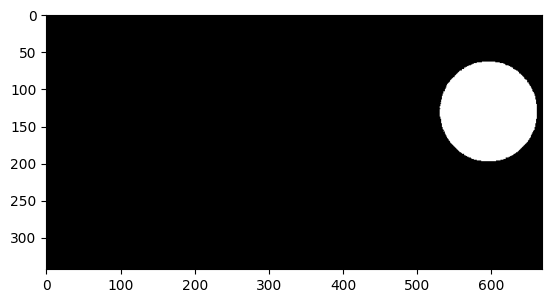

In [25]:
# all angles

angles = [
    (90, 135), #green
    [26,90], #yellow
    [0,25], #orange
]

for angle in angles:
    lower_value = np.array([int(angle[0]/360*255), 50, 50])
    upper_value = np.array([int(angle[1]/360*255), 255, 255])

    mask = cv2.inRange(hsv_img, lower_value, upper_value)

    plt.figure()
    plt.imshow(mask, cmap='gray')

In [36]:
# Set the minimum and maximum values for the H channel in HSV color space
min_value_H = 0
max_value_H = 360

# Convert the minimum and maximum values to the range of 0-255 for OpenCV
low_H = int(min_value_H/360*255)
high_H = int(max_value_H/360*255)

# Set the minimum and maximum values for the S and V channels in HSV color space
min_value = 50
max_value = 255

# Set the lower and upper bounds for the color range
low_V = min_value
high_V = max_value
low_S = min_value
high_S = max_value

# Set the names for the windows used in the application
window_capture_name = 'Video Capture'
window_detection_name = 'Colour Mask'
window_control_name = 'Control window'

# Set the names for the trackbars used to control the color range
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'

# Define a callback function for the trackbars
def empty(i):
    pass

# Define callback functions for the trackbars that update the corresponding values
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = int(val/360*255)
    low_H = min(high_H-1, low_H)
    cv2.setTrackbarPos(low_H_name, window_control_name, int(low_H*360/255))

def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = int(val/360*255)
    high_H = max(high_H, low_H+1)
    cv2.setTrackbarPos(high_H_name, window_control_name, int(high_H*360/255))


In [35]:
# Start video capture
cap = cv2.VideoCapture(0)

# create windows to display capture video and computed colour mask
cv2.namedWindow(window_capture_name)
cv2.namedWindow(window_detection_name)
cv2.namedWindow(window_control_name)

# create trackbars
cv2.createTrackbar(low_H_name, window_control_name , low_H,
max_value_H, on_low_H_thresh_trackbar)
cv2.createTrackbar(high_H_name, window_control_name , high_H,
max_value_H, on_high_H_thresh_trackbar)
cv2.createTrackbar(low_S_name, window_control_name , low_S,
max_value, on_low_S_thresh_trackbar)
cv2.createTrackbar(high_S_name, window_control_name , high_S,
max_value, on_high_S_thresh_trackbar)
cv2.createTrackbar(low_V_name, window_control_name , low_V,
max_value, on_low_V_thresh_trackbar)
cv2.createTrackbar(high_V_name, window_control_name , high_V,
max_value, on_high_V_thresh_trackbar)

while True:
    ret, frame = cap.read()
    if frame is None:
        break
    frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(frame_HSV, (low_H, low_S, low_V), (high_H,
    high_S, high_V))
    # display images
    cv2.imshow(window_capture_name, frame)
    cv2.imshow(window_detection_name, mask)
    # press "q" to stop
    key = cv2.waitKey(30)
    if key == ord('q') or key == 27:
        break
cap.release()
cv2.destroyAllWindows()